In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import random
from funcs_8_lab_cats_dogs import *

In [2]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)
BATCH_SIZE = 32
EPOCHS = 50

train_dir = '..\\cnn_data\\cats_and_dogs'
cats_dir = os.path.join(train_dir, 'cats')
dogs_dir = os.path.join(train_dir, 'dogs')

print(f"Количество изображений кошек: {len(os.listdir(cats_dir))}")
print(f"Количество изображений собак: {len(os.listdir(dogs_dir))}")

Количество изображений кошек: 1000
Количество изображений собак: 1000


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True,     
    seed=42
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


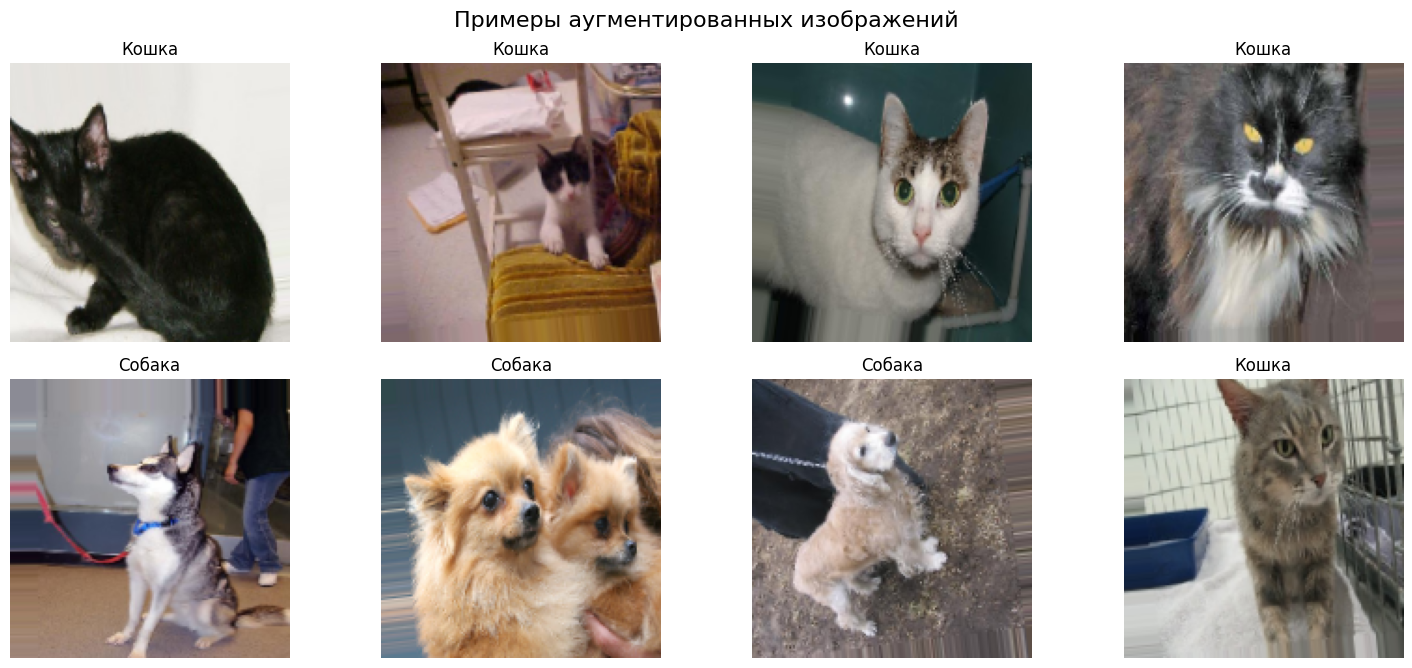

In [4]:
show_augmented_images(train_generator)

In [5]:
cats_dogs_cnn = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

cats_dogs_cnn.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

history = cats_dogs_cnn.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    verbose=1
)

c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.4978 - loss: 0.7084 - val_accuracy: 0.5703 - val_loss: 0.6683
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.6192 - loss: 0.6585 - val_accuracy: 0.5729 - val_loss: 0.6460
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.6089 - loss: 0.6459 - val_accuracy: 0.6094 - val_loss: 0.6392
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.6806 - loss: 0.6121 - val_accuracy: 0.6536 - val_loss: 0.6435
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.6658 - loss: 0.6287 - val_accuracy: 0.6536 - val_loss: 0.6133
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.6689 - loss: 0.6058 - val_accuracy: 0.6380 - val_loss: 0.6021
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.6439 - loss: 0.6170 - val_accuracy: 0.6719 - val_loss: 0.5863
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.7060 - loss: 0.5912 - val_accuracy: 0.

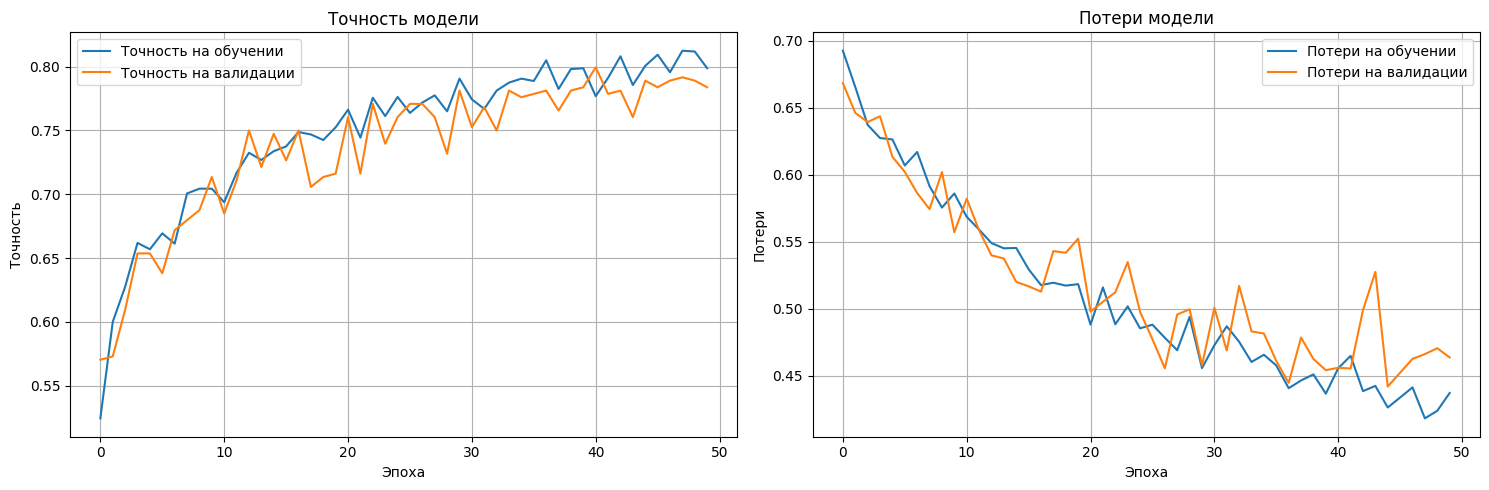

In [6]:
plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


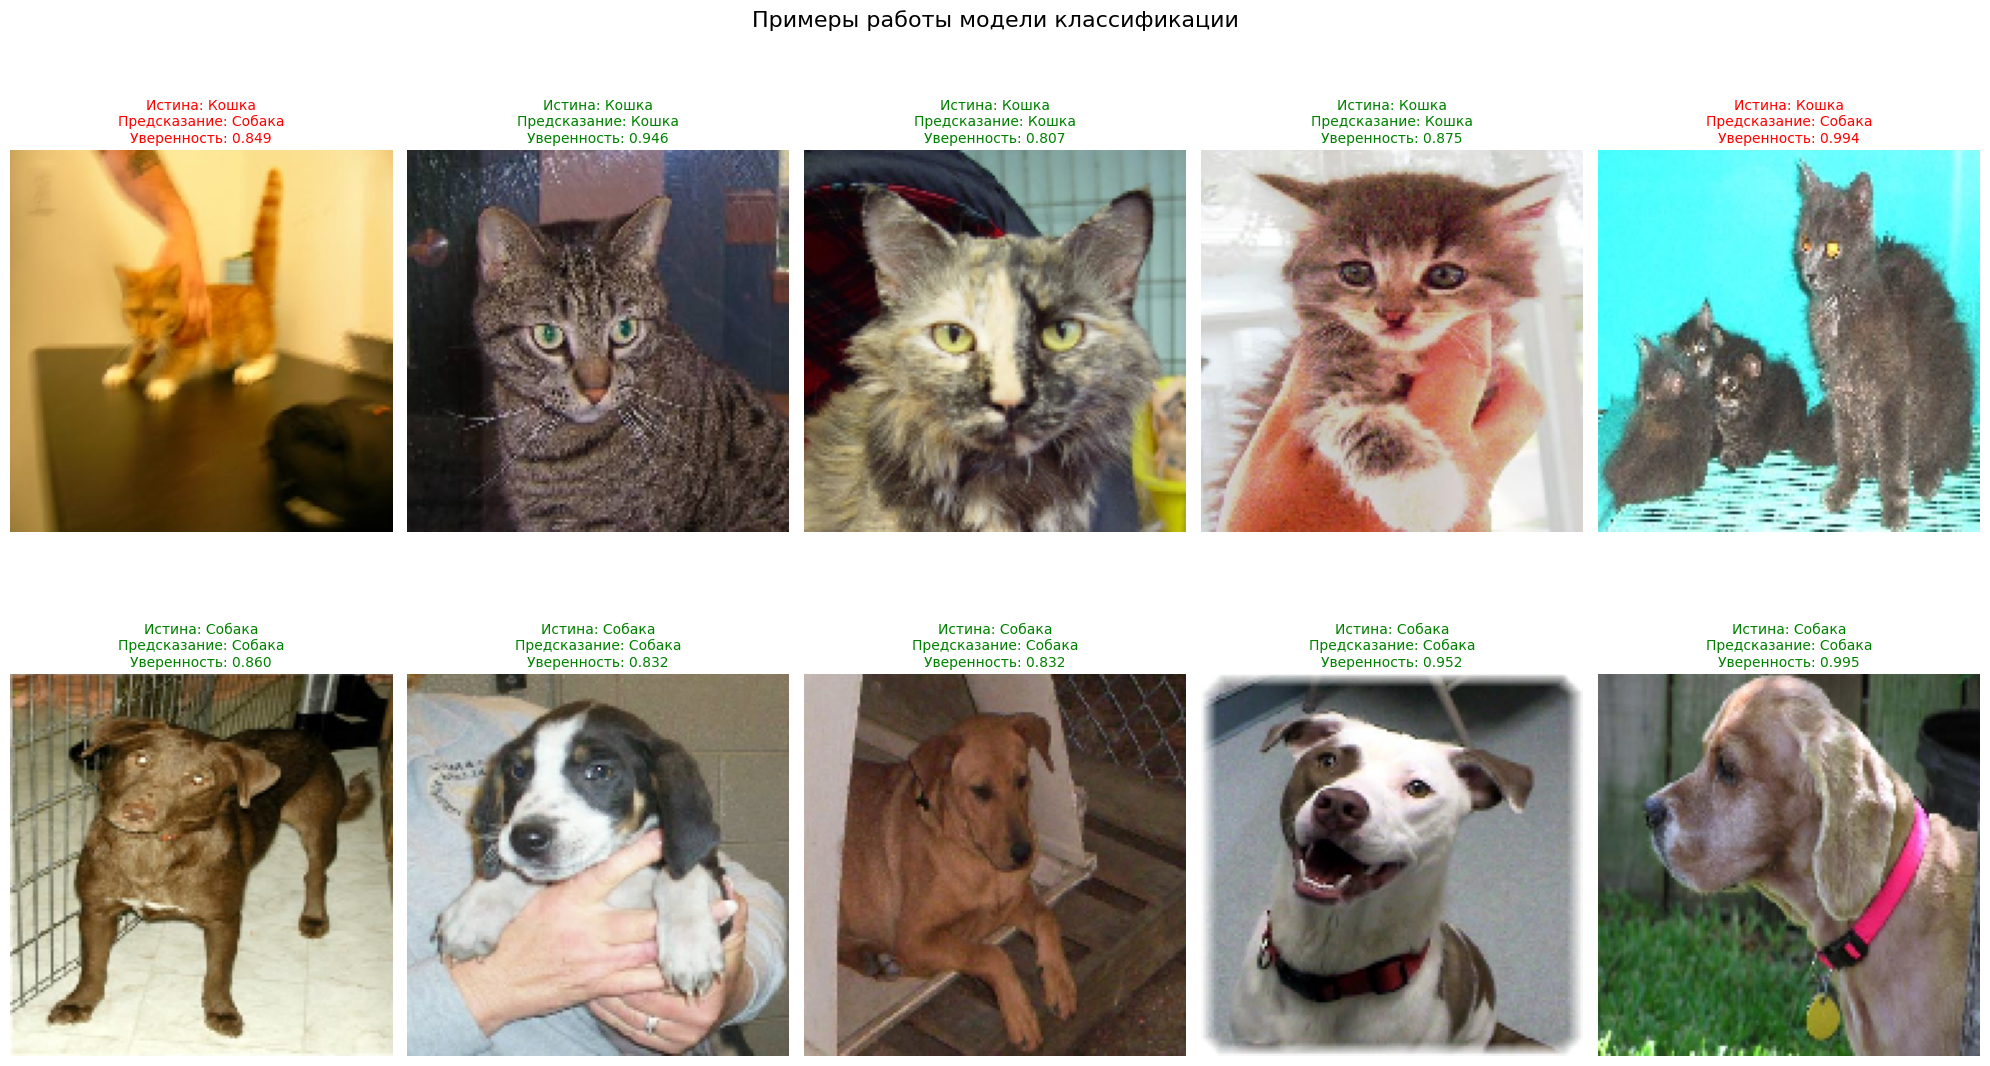

In [7]:
show_predictions(cats_dogs_cnn, [cats_dir, dogs_dir], IMG_SIZE)

In [8]:
print(f"Финальная точность на валидации: {max(history.history['val_accuracy']):.4f}")

Финальная точность на валидации: 0.7995
